In [2]:
import xarray as xr
import numpy as np
import xmitgcm
from matplotlib import pyplot as plt
from dask.diagnostics import ProgressBar
import os
from tqdm import tqdm
%matplotlib inline

In [2]:
# need to limit the number of threads used
import dask
from multiprocessing.pool import ThreadPool
pool = ThreadPool(32)
dask.set_options(pool=pool)  # set global threadpool

In [3]:
# optional...allows you to monitor dask performance
from distributed import Client
#client.shutdown()
client = Client("tcp://129.236.21.48:8786")
client

<Client: scheduler='tcp://129.236.21.48:8786' processes=4 cores=16>

In [42]:
client.restart()

distributed.client - WARNING - Couldn't gather keys {"('getitem-83f28a4f01de766c85f7a3745a9d4754', 16, 0, 0, 0)": [], "('getitem-83f28a4f01de766c85f7a3745a9d4754', 23, 0, 0, 0)": [], "('getitem-83f28a4f01de766c85f7a3745a9d4754', 9, 0, 0, 0)": [], "('getitem-83f28a4f01de766c85f7a3745a9d4754', 5, 0, 0, 0)": [], "('getitem-83f28a4f01de766c85f7a3745a9d4754', 20, 0, 0, 0)": [], "('getitem-83f28a4f01de766c85f7a3745a9d4754', 12, 0, 0, 0)": [], "('getitem-83f28a4f01de766c85f7a3745a9d4754', 11, 0, 0, 0)": [], "('getitem-83f28a4f01de766c85f7a3745a9d4754', 18, 0, 0, 0)": [], "('getitem-83f28a4f01de766c85f7a3745a9d4754', 0, 0, 0, 0)": [], "('getitem-83f28a4f01de766c85f7a3745a9d4754', 19, 0, 0, 0)": [], "('getitem-83f28a4f01de766c85f7a3745a9d4754', 4, 0, 0, 0)": [], "('getitem-83f28a4f01de766c85f7a3745a9d4754', 7, 0, 0, 0)": [], "('getitem-83f28a4f01de766c85f7a3745a9d4754', 2, 0, 0, 0)": [], "('getitem-83f28a4f01de766c85f7a3745a9d4754', 8, 0, 0, 0)": [], "('getitem-83f28a4f01de766c85f7a3745a9d4754'

<Client: scheduler='tcp://129.236.21.48:8786' processes=1 cores=4>

In [3]:
from glob import glob
ddir = '/swot/SUM01/LLC/llc_4320_agulhas/'
all_files = glob(os.path.join(ddir, 'llc_4320_agulhas.0*.nc'))
all_files[-1]

'/swot/SUM01/LLC/llc_4320_agulhas/llc_4320_agulhas.0000047808.nc'

In [8]:
%time ds = xr.open_mfdataset(ddir + 'llc_4320_agulhas.0*.nc', decode_cf=False, autoclose=True)

CPU times: user 1min 55s, sys: 25.4 s, total: 2min 21s
Wall time: 17min 5s


In [16]:
%time ds = xr.open_dataset(all_files[-1], decode_cf=False)
ds

CPU times: user 25.4 ms, sys: 327 µs, total: 25.7 ms
Wall time: 24.8 ms


<xarray.Dataset>
Dimensions:   (i: 2160, i_g: 2160, j: 2160, j_g: 2160, k: 90, k_l: 90, k_p1: 91, k_u: 90, time: 1)
Coordinates:
  * i         (i) int64 1080 1081 1082 1083 1084 1085 1086 1087 1088 1089 ...
  * i_g       (i_g) int64 1080 1081 1082 1083 1084 1085 1086 1087 1088 1089 ...
  * j         (j) float64 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * j_g       (j_g) float64 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 ...
  * k         (k) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * k_l       (k_l) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * k_p1      (k_p1) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * k_u       (k_u) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * time      (time) float64 1.195e+06
Data variables:
    Eta       (time, j, i) float32 ...
    PhiBot    (time, j, i) float32 ...
    SIarea    (time, j, i) float32 ...
    SIheff    (time, j, i) float32 ...
    SIhsalt   (time, j,

In [17]:
# fix time
ds['time'].attrs['units'] = 'seconds since 2011-01-01'
ds = xr.decode_cf(ds)

In [18]:
grid = xr.open_dataset(os.path.join(ddir, 'llc_4320_agulhas_grid.nc'))
grid

<xarray.Dataset>
Dimensions:  (i: 2160, i_g: 2160, j: 2160, j_g: 2160, k: 90, k_l: 90, k_p1: 91, k_u: 90)
Coordinates:
  * k        (k) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * j_g      (j_g) float64 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * k_u      (k_u) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * k_p1     (k_p1) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * i        (i) int64 1080 1081 1082 1083 1084 1085 1086 1087 1088 1089 ...
  * j        (j) float64 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * k_l      (k_l) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * i_g      (i_g) int64 1080 1081 1082 1083 1084 1085 1086 1087 1088 1089 ...
    face     int64 ...
    YC       (j, i) float32 ...
    YG       (j_g, i_g) float32 ...
    XC       (j, i) float32 ...
    XG       (j_g, i_g) float32 ...
    Zp1      (k_p1) float32 ...
    Z        (k) float32 ...
    Zl       (k_l) float32 

In [19]:
ds = xr.auto_combine([ds, grid])
ds = xmitgcm.mds_store._swap_dimensions(ds, geometry='sphericalpolar')
ds

<xarray.Dataset>
Dimensions:   (XC: 2160, XG: 2160, YC: 2160, YG: 2160, Z: 90, Zl: 90, Zp1: 91, Zu: 90, time: 1)
Coordinates:
  * YC        (YC) float32 -57.001 -56.99 -56.9789 -56.9678 -56.9567 ...
  * YG        (YG) float32 -57.0066 -56.9955 -56.9844 -56.9733 -56.9623 ...
  * XC        (XC) float32 -15.4896 -15.4688 -15.4479 -15.4271 -15.4062 ...
  * XG        (XG) float32 -15.5 -15.4792 -15.4583 -15.4375 -15.4167 ...
  * Zp1       (Zp1) float32 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 ...
  * Z         (Z) float32 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
  * Zl        (Zl) float32 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 ...
  * Zu        (Zu) float32 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
  * time      (time) datetime64[ns] 2011-01-14T20:00:00
Data variables:
    face      int64 1
    rA        (YC, XC) float32 ...
    rAw       (YC, XG) float32 ...
    rAs       (YG, XC) float32 ...
    rAz       (YG, XG) float32 ...
    dxG       (YG, XC) floa

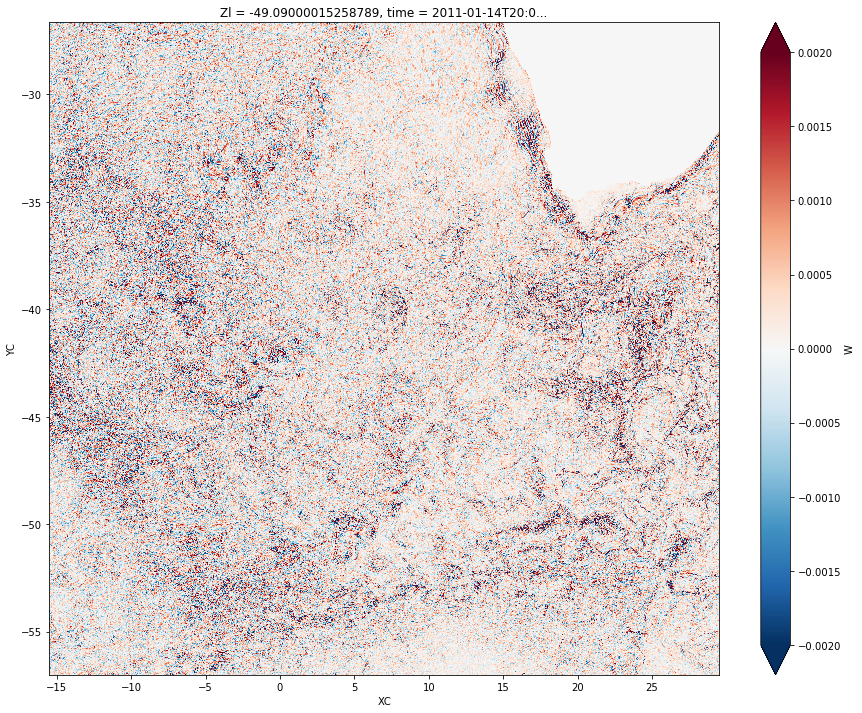

In [29]:
plt.rcParams['figure.figsize'] = (15,12)
ds.W[0].sel(Zl=-50, method='nearest').plot(vmax=0.002)

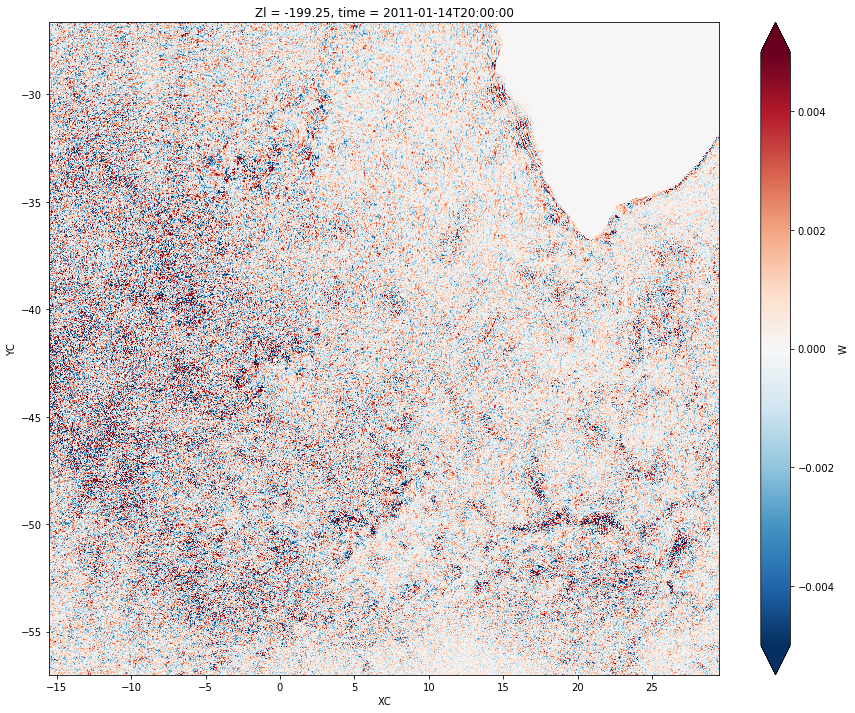

In [26]:
ds.W[0].sel(Zl=-200, method='nearest').plot(vmax=0.005)

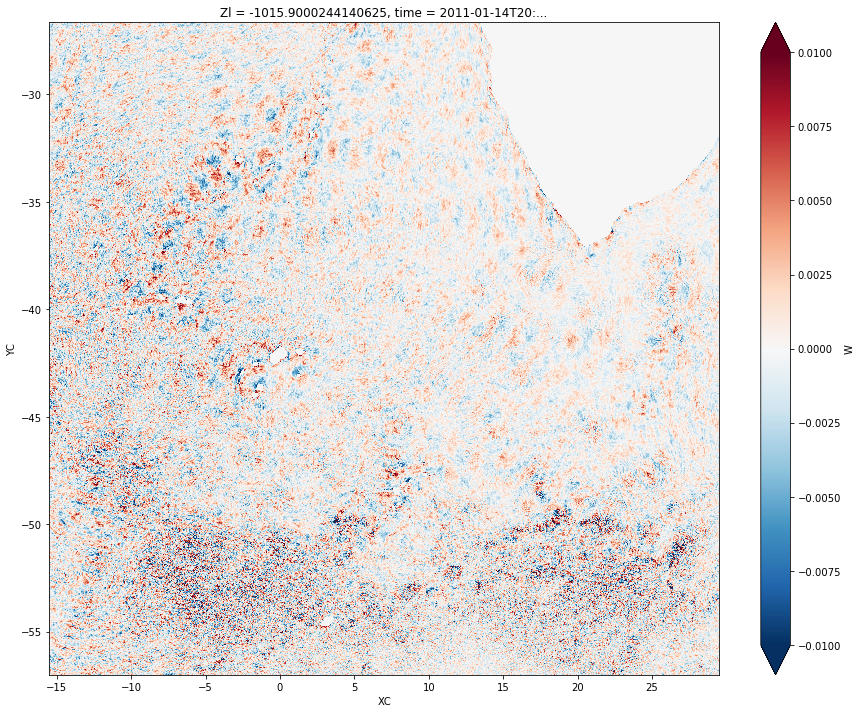

In [25]:
ds.W[0].sel(Zl=-1000, method='nearest').plot(vmax=0.01)

In [27]:
# drop iter!
print('iter' in ds.coords)
ds = ds.reset_coords(drop=True)
print('iter' in ds.coords)

True
False


In [30]:
ds['time.dayofyear']

<xarray.DataArray 'dayofyear' (time: 1752)>
array([ 4,  4,  4, ..., 76, 76, 76], dtype=int32)
Coordinates:
  * time     (time) datetime64[ns] 2011-01-04 2011-01-04T01:00:00 ...

In [32]:
gb = ds.groupby('time.dayofyear')
gb.groups[4]

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [39]:
for gname, gds in gb:
    break

In [44]:
ds.chunks

Frozen(SortedKeysDict({}))

In [41]:
%time one_day = gds.mean(dim='time')

KeyboardInterrupt: 

In [37]:
# why does it load data?!?
%time ds_daily = gb.mean(dim='time')

KeyboardInterrupt: 

In [36]:
day, datasets = zip(*gb)
prefix = 'llc_4320_agulhas'
paths = [os.path.join(ddir, 'daily_average', '%s.day_%04d.nc' % (prefix, d)) for d in day]

In [6]:
# chunk in vertical direction...should make things faster, but idk if it does
#ds = ds.chunk({'k': 1, 'k_l': 1, 'k_u': 1, 'k_p1': 1})

In [22]:
time = xr.DataArray(ds.time.data, dims='time', coords={'time': ds.time.data})
time

<xarray.DataArray (time: 1752)>
array(['2011-01-04T00:00:00.000000000', '2011-01-04T01:00:00.000000000',
       '2011-01-04T02:00:00.000000000', ..., '2011-03-17T21:00:00.000000000',
       '2011-03-17T22:00:00.000000000', '2011-03-17T23:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2011-01-04 2011-01-04T01:00:00 ...

In [ ]:
time['time.yearday']

In [5]:
# swap logical dimensions for physical ones
ds = xmitgcm.mds_store._swap_dimensions(ds, geometry='sphericalpolar')

# apparently swap_dims screws up coordinates, need to reset them
should_be_coords = [v for v in ds.data_vars if ('time' not in ds[v].dims) ]
ds = ds.set_coords(should_be_coords)

KeyError: 'XC'

In [32]:
# should now be ready
%time ds

CPU times: user 8 µs, sys: 1 µs, total: 9 µs
Wall time: 17.6 µs


Exception ignored in: <bound method Future.__del__ of <Future: status: cancelled, key: ('getitem-90a6168c632d3000440a4a22b30f9e7c', 0)>>
Traceback (most recent call last):
  File "/home/rpa/.conda/envs/dask_distributed/lib/python3.5/site-packages/distributed/client.py", line 234, in __del__
    self.release()
  File "/home/rpa/.conda/envs/dask_distributed/lib/python3.5/site-packages/distributed/client.py", line 222, in release
    self.client._dec_ref(tokey(self.key))
  File "/home/rpa/.conda/envs/dask_distributed/lib/python3.5/site-packages/distributed/client.py", line 542, in _dec_ref
    self._release_key(key)
  File "/home/rpa/.conda/envs/dask_distributed/lib/python3.5/site-packages/distributed/client.py", line 553, in _release_key
    'client': self.id})
  File "/home/rpa/.conda/envs/dask_distributed/lib/python3.5/site-packages/distributed/client.py", line 428, in _send_to_scheduler
    raise Exception("Client not running.  Status: %s" % self.status)
Exception: Client not running.

<xarray.Dataset>
Dimensions:   (XC: 2160, XG: 2160, YC: 2160, YG: 2160, Z: 90, Zl: 90, Zp1: 91, Zu: 90, time: 1752)
Coordinates:
  * time      (time) datetime64[ns] 2011-01-04 2011-01-04T01:00:00 ...
  * YC        (YC) float32 -57.001 -56.99 -56.9789 -56.9678 -56.9567 ...
  * YG        (YG) float32 -57.0066 -56.9955 -56.9844 -56.9733 -56.9623 ...
  * XC        (XC) float32 -15.4896 -15.4688 -15.4479 -15.4271 -15.4062 ...
  * XG        (XG) float32 -15.5 -15.4792 -15.4583 -15.4375 -15.4167 ...
  * Zp1       (Zp1) float32 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 ...
  * Z         (Z) float32 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
  * Zl        (Zl) float32 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 ...
  * Zu        (Zu) float32 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
    rA        (YC, XC) float32 1.5528e+06 1.5528e+06 1.5528e+06 1.5528e+06 ...
    rAw       (YC, XG) float32 1.5528e+06 1.5528e+06 1.5528e+06 1.5528e+06 ...
    rAs       (YG, XC) float3

In [ ]:
%time salt2_mean = (ds.Salt**2).mean(dim=['time', 'YC', 'XC'])

In [10]:
client.restart()

<Client: scheduler='tcp://129.236.21.48:8786' processes=1 cores=32>

In [20]:
sst = ds.Theta[0,0].where(ds.hFacC[0]).load()

In [14]:
sss = ds.Salt[0,0].where(ds.hFacC[0]).load()

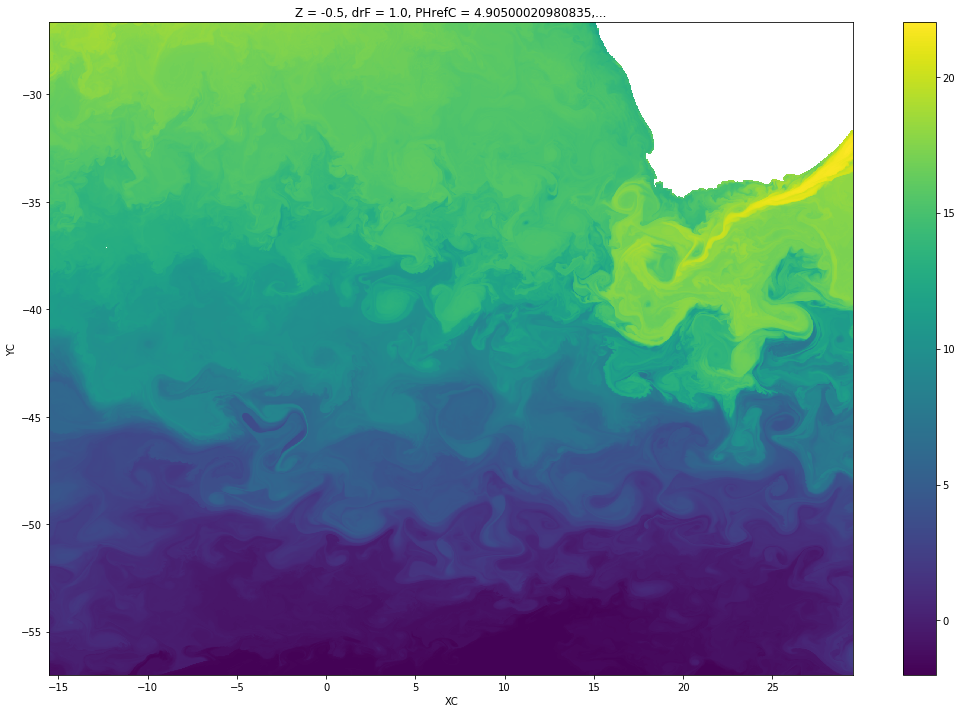

In [15]:
plt.figure(figsize=(18,12))
sst.plot(vmin=-2, vmax=22)

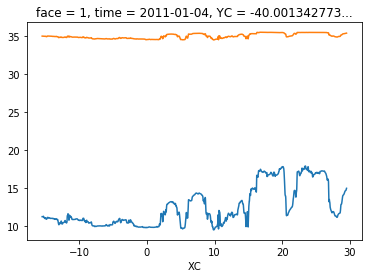

In [53]:
sst.sel(YC=-40, method='nearest').plot()
sss.sel(YC=-40, method='nearest').plot()

In [15]:
client

<Client: scheduler='tcp://129.236.21.48:8786' processes=4 cores=4>

In [23]:
client.restart()

distributed.utils - ERROR - ('/swot/SUM01/LLC/llc_4320_agulhas/llc_4320_agulhas.0000026928.nc:/U-516827efd4223946fd7053ac7f779666', 'tcp://129.236.21.48:34544')
Traceback (most recent call last):
  File "/home/rpa/.conda/envs/dask_distributed/lib/python3.5/site-packages/distributed/utils.py", line 193, in f
    result[0] = yield gen.maybe_future(func(*args, **kwargs))
  File "/home/rpa/.conda/envs/dask_distributed/lib/python3.5/site-packages/tornado/gen.py", line 1015, in run
    value = future.result()
  File "/home/rpa/.conda/envs/dask_distributed/lib/python3.5/site-packages/tornado/concurrent.py", line 237, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 3, in raise_exc_info
  File "/home/rpa/.conda/envs/dask_distributed/lib/python3.5/site-packages/tornado/gen.py", line 1021, in run
    yielded = self.gen.throw(*exc_info)
  File "/home/rpa/.conda/envs/dask_distributed/lib/python3.5/site-packages/distributed/client.py", line 1486, in _get
    result = yield self.

<Client: scheduler='tcp://129.236.21.48:8786' processes=4 cores=4>

In [10]:
# a test point
lon = 14.71
lat = -30.44
depth = -215

In [ ]:
# very slow, doesn't really seem to work
u_point = ds.U.sel_points(method='nearest',
                          Z=[depth], YC=[lat], XG=[lon])
u_point

In [33]:
%time u_point = ds.U.sel(Z=depth, method='nearest'). sel(YC=lat, method='nearest'). sel(XG=lon, method='nearest')

CPU times: user 15.9 ms, sys: 495 µs, total: 16.3 ms
Wall time: 14.5 ms


In [ ]:
%time u_point.load()

In [11]:
i = grid.indexes['XG'].get_loc(lon, method='nearest')
j = grid.indexes['YC'].get_loc(lat, method='nearest')
k = grid.indexes['Z'].get_loc(depth, method='nearest')
(k,j,i)

(28, 1934, 1450)

In [47]:
%time u_point = ds.U[:, k, j, i]

CPU times: user 8.98 ms, sys: 53 µs, total: 9.03 ms
Wall time: 9.71 ms


In [48]:
# why shoudl this eat memory
%time u_point.load()

KeyboardInterrupt: 

In [37]:
from tqdm import tqdm

In [39]:
# what if we bypass xarray completely
import netCDF4

ts = np.zeros(len(all_files))
for n, fname in enumerate(tqdm(all_files)):
    nc = netCDF4.Dataset(fname)
    ts[n] = nc.variables['Salt'][:,k,j,i]
    nc.close()

100%|██████████| 1752/1752 [02:38<00:00, 11.56it/s]


In [41]:
%time ds = xr.open_dataset(fname)

CPU times: user 39.4 ms, sys: 8.97 ms, total: 48.4 ms
Wall time: 129 ms


In [42]:
%time s0 = ds.Salt[:,k,j,i].values

CPU times: user 5.13 ms, sys: 1.07 ms, total: 6.2 ms
Wall time: 40.2 ms


In [44]:
# same thing with xarray
ts = np.zeros(len(all_files))
for n, fname in enumerate(tqdm(all_files)):
    ds1 = xr.open_dataset(fname)
    ts[n] = ds1['Salt'][:,k,j,i]
    ds.close()

100%|██████████| 1752/1752 [03:29<00:00,  8.74it/s]


In [31]:
%time s_point = ds['Salt'][:, k, j, i].load()

KeyboardInterrupt: 

In [26]:
from dask.dot import dot_graph

In [24]:
test = ds['Salt'][:, k, j, i]

In [28]:
dot_graph(test.data.dask)

RuntimeError: failed to execute ['dot', '-Tpng'], make sure the Graphviz executables are on your systems' path

In [29]:
test.variable._data

dask.array<getitem, shape=(1752,), dtype=float32, chunksize=(1,)>

In [30]:
del client